# Corso di Probabilità e Statistica - Analisi statistica e visualizzazione di dati con pandas

In questo capitolo useremo la libreria pandas per analizzare dati in modo qualitativo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats # Statistica
import seaborn as sns # Grafica avanzata 

In [2]:
%matplotlib inline
import pandas as pd
from scipy.stats import trim_mean
import statsmodels
from statsmodels import robust

## Esempio: murder rate (USA)
Nell'esempio successivo ci viene fornito un file con i tassi di omicidio negli stati USA. L'obiettivo è di aprire il file fare qualche analisi statistica di base e esplorare/visualizzare il database.


In [3]:
# importiamo i dati
state = pd.read_csv("../data/state.csv") 

**Osservazione:** State è un oggetto di tipo pandas, che nello specifico significa che è un dataset organizzato in un certo modo, secondo certi attributi.

In pratica sto creando nuovo tipo di oggetto che ho scelto di chiamare state che porta con se una serie di informazioni. In particolare ha associato un indice, un nome, un numero che indica la popolazione e un rate di omicidio, come ultimo elemento ho una abbreviazione di due lettere dello stato.

In [4]:
# apriamo il file (le prime 8 righe)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In realtà state è una sorta di matrice, che coincide esattamente con quello che è scritto nel file .csv

In [5]:
print(state)

             State  Population  Murder.Rate Abbreviation
0          Alabama     4779736          5.7           AL
1           Alaska      710231          5.6           AK
2          Arizona     6392017          4.7           AZ
3         Arkansas     2915918          5.6           AR
4       California    37253956          4.4           CA
5         Colorado     5029196          2.8           CO
6      Connecticut     3574097          2.4           CT
7         Delaware      897934          5.8           DE
8          Florida    18801310          5.8           FL
9          Georgia     9687653          5.7           GA
10          Hawaii     1360301          1.8           HI
11           Idaho     1567582          2.0           ID
12        Illinois    12830632          5.3           IL
13         Indiana     6483802          5.0           IN
14            Iowa     3046355          1.9           IA
15          Kansas     2853118          3.1           KS
16        Kentucky     4339367 

So che state, per ogni vettore di cui è costituito possiede un attributo di tipo "Population" e posso chiedere di calcolare direttamente la media su questo attributo.

In [6]:
# calcoliamo la popolazione media
state['Population'].mean()

6162876.3

Faccio la stessa cosa epr il murder rate

In [7]:
# calcoliamo il tasso di omicidio medio
state['Murder.Rate'].mean()

4.066

In [8]:
# mediana
state['Population'].median()

4436369.5

In [9]:
# standard deviation
state['Population'].std()

6848235.347401142

In [10]:
# quantili
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
#argomento della funzione 


0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Questo mi consente di determinare i valori corrispondenti a diversi quantili, i quantili su cui voglio informazioni sono l'argomento della funzione.

Text(0.5, 1.0, 'Histogram')

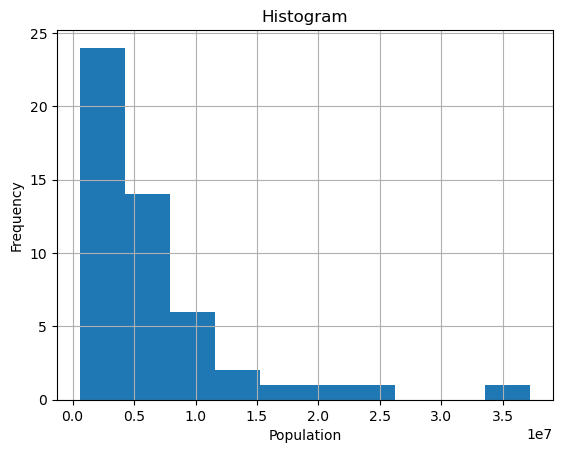

In [11]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 10})
#istogramma
state["Population"].hist()
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histogram')

Text(0, 0.5, 'Murder Rate')

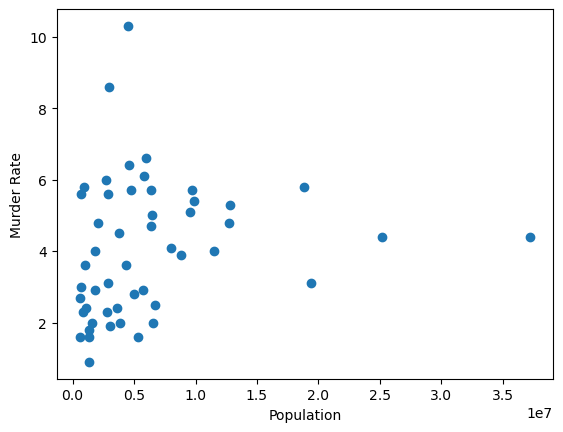

In [12]:
x=state["Population"]
y=state["Murder.Rate"]
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('Murder Rate')

Ho unpì punto per ogni stato, quello che voglio far vedere è come varia il murder rate a seconda della popolazione dello stato. Sarebbe utile utilizzare una legenda colore per ottenere informazioni e almeno capire cosa sto guardando.

<AxesSubplot:xlabel='Population', ylabel='Murder.Rate'>

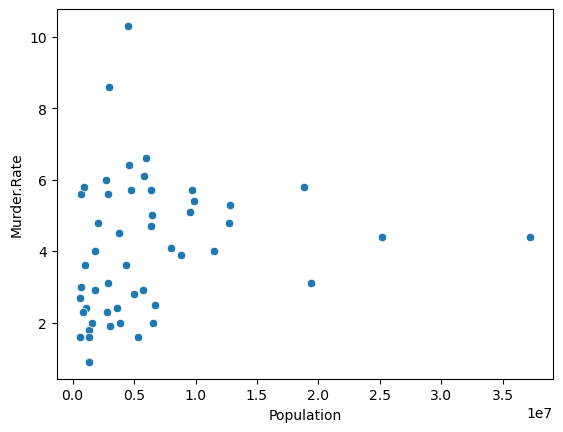

In [13]:
#stessa cosa con seaborn
sns.scatterplot(data=state, x="Population", y="Murder.Rate")

In [14]:
# classifichiamo i dati a seconda della popolazione
state["Population High"]=(state["Population"]>1e7)

<AxesSubplot:xlabel='Population High', ylabel='Murder.Rate'>

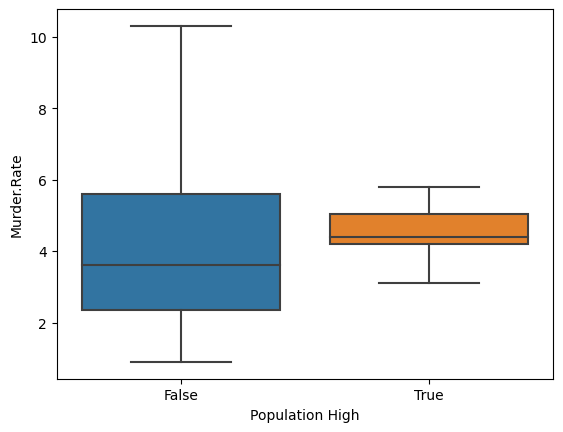

In [15]:
# Plot categorici
sns.boxplot(data=state, x="Population High", y="Murder.Rate" )

* Prima osservazione: il boxplot utilizzato come in questo caso mi dà una informazione sulla distribuzione
* Lettura del grafico:
    * Ho due box, uno per gli stati con una popolazione alta (True) e uno per gli stati con una popolazione bassa (False)
    * Come nei boxplot che si possono realizzare normalmentela posizione delle linee mi definisce i quantili, in questo caso probabilmente è una delle rappresentazioni che possono descrivere meglio i dati

In [16]:
# Definiamo una nuova colonna 
state.loc[state["Population High"],"Population Level"]="High"
#in pratica con la riga di codice sopra gli sto dicendo che se quello stato si trova all'interno dell'oggetto
#che ho creato localmente per gli stati con una popolazione alta alloradefinisco l'attributo "population high" true

state.loc[~state["Population High"],"Population Level"]="Low"
#con questa riga sto associando a ciascun indice un high or low 

Con il pezzo di codice sopra sto modificando l'oggetto dataset di Pandas aggiungendo un attributo. Provo a stampare l'oggetto per vedere che cosa ho modificato

In [17]:
print(state)

             State  Population  Murder.Rate Abbreviation  Population High  \
0          Alabama     4779736          5.7           AL            False   
1           Alaska      710231          5.6           AK            False   
2          Arizona     6392017          4.7           AZ            False   
3         Arkansas     2915918          5.6           AR            False   
4       California    37253956          4.4           CA             True   
5         Colorado     5029196          2.8           CO            False   
6      Connecticut     3574097          2.4           CT            False   
7         Delaware      897934          5.8           DE            False   
8          Florida    18801310          5.8           FL             True   
9          Georgia     9687653          5.7           GA            False   
10          Hawaii     1360301          1.8           HI            False   
11           Idaho     1567582          2.0           ID            False   

Con questo plot mi aspetto di ottenere un grafico uguale a quello precedente, semplicemente la divisione sulla base delle popolosità degli stati è fatta in precedenza e quindi è già contenuta all'interno del dataset

<AxesSubplot:xlabel='Population Level', ylabel='Murder.Rate'>

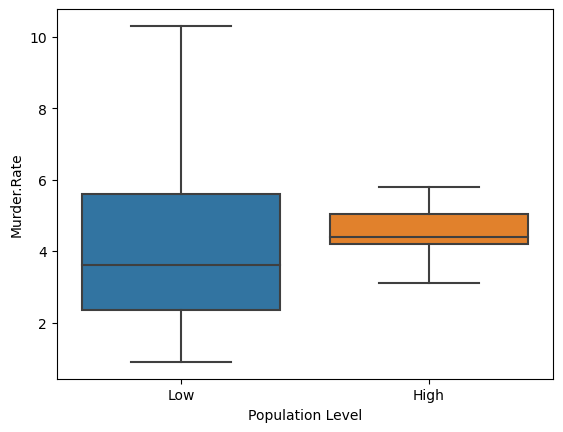

In [18]:
# Plot categorico
sns.boxplot(data=state, x="Population Level", y="Murder.Rate" )

<AxesSubplot:xlabel='Population Level', ylabel='Murder.Rate'>

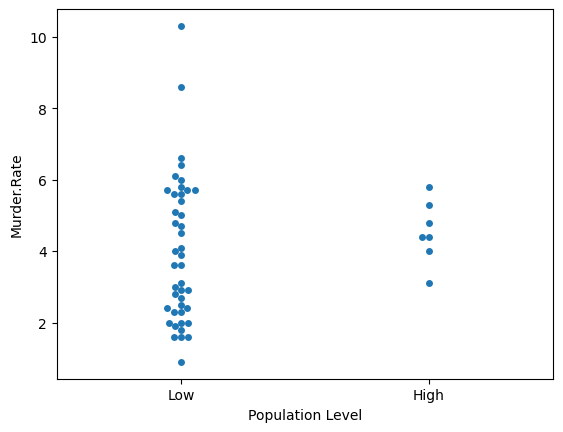

In [19]:
# Plot categorico (swarmplot)
sns.swarmplot(data=state, x="Population Level", y="Murder.Rate" )

In pratica sto guardando la stessa cosa di prima solo che in questo caso sto facendo uno scatterplot anzichè un boxplot e sto plottando un altro attributo dell'oggetto in questione nello specifico il livello di popolazione.

<AxesSubplot:xlabel='Population', ylabel='Murder.Rate'>

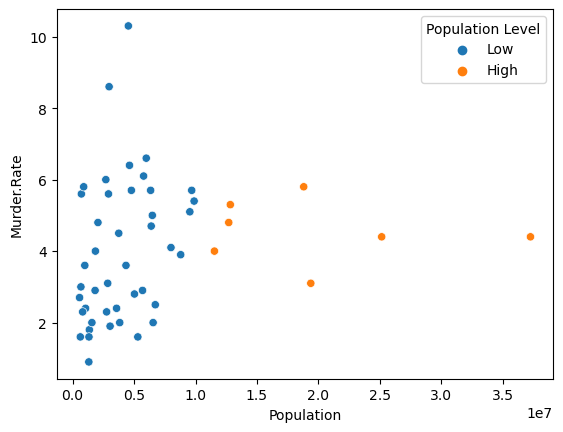

In [20]:
#Coloriamo a seconda del valore di una variabile
sns.scatterplot(data=state, x="Population", y="Murder.Rate", hue="Population Level")

### Esempio: traffico aereo

In questo esempio utilizziamo un file che riporta i ritardi del traffico aereo di una serie di compagnie aeree.

In [21]:
# levggiamo i dati 
airlines = pd.read_csv("../data/airline_stats.csv")

In [22]:
# troviamo la lista di compagnie aeree nel dataframe
airlines["airline"].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [23]:
#guardiamo il file
airlines

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


**Statistica**

Calcoliamo la media e deviazione standard dei ritardi per compagnia. Abbiamo tre tipologie di ritardo: carrier_delay (dovuto alla compagnia) atc_delay (dov uto all'aeroporto) weather_delay (dovuto al meteo).

Per questo raggrupiamo usando groupby()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html



In [24]:
mediegen = airlines.mean()

<ipython-input-24-f14f9577aa77>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mediegen = airlines.mean()


In [25]:
mediegen

pct_carrier_delay    7.041475
pct_atc_delay        5.089962
pct_weather_delay    0.684776
dtype: float64

Se chiedo di fare la media su tutto il file mi fa semplicemente la media per ogni colonna (perchè assumo che i dati siano organizzati in colonne a seconda del tipo.

Per fare sì che la media sia distinta anche per compagni aerea (proprietà per cui ho una colonna dedicata associata agli altri valori), devo raggruppare le colonne sulla base del "valore" assegnato alla proprietà "airline". Dato che il dataset organizzato in colonne si chiama *airlines* la sintassi sarà airlines.groupby("airline")

In [26]:
group = airlines.groupby("airline")

In [27]:
group

In [28]:
medie=airlines.groupby("airline").mean()
#per calcolare la media per ciascuna compagnia aerea e suddivisa per tipo di ritardo 
#idealmente se facessi semplicaemente airlines
dev_standard=airlines.groupby("airline").std()

In [29]:
medie

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
Alaska,3.521889,5.472672,0.513497
American,9.042180,5.993529,1.122920
Delta,6.333460,4.462978,0.680765
Jet Blue,8.081843,7.345231,0.465327
Southwest,7.521997,3.147019,0.512611
United,7.398833,5.348133,0.680697


In [30]:
dev_standard

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
Alaska,2.483224,5.699303,1.136494
American,4.139067,4.647170,1.097811
Delta,4.695292,4.364335,1.093255
Jet Blue,3.797737,5.227372,0.764147
Southwest,3.345085,2.513162,0.649631
United,5.369283,4.992464,1.338433


Quale è la causa principale di ritardo?

In [31]:
airlines.mean()

<ipython-input-31-6e944ab408bf>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  airlines.mean()


pct_carrier_delay    7.041475
pct_atc_delay        5.089962
pct_weather_delay    0.684776
dtype: float64

**Plot categorici**

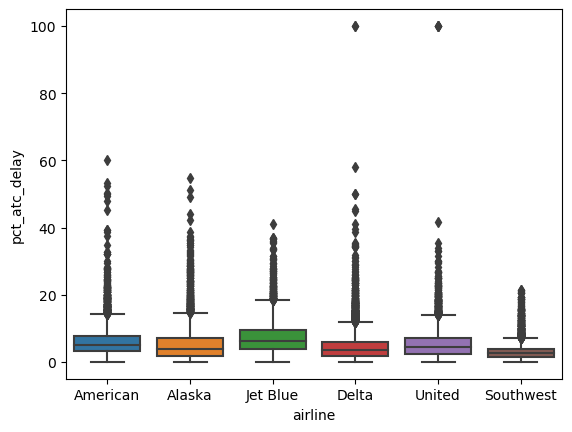

In [32]:
# Plot categorico
ax=sns.boxplot(data=airlines, x="airline", y="pct_atc_delay" )

Come rendere leggibili le label sull'asse x?

[Text(0, 0, 'American'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Jet Blue'),
 Text(3, 0, 'Delta'),
 Text(4, 0, 'United'),
 Text(5, 0, 'Southwest')]

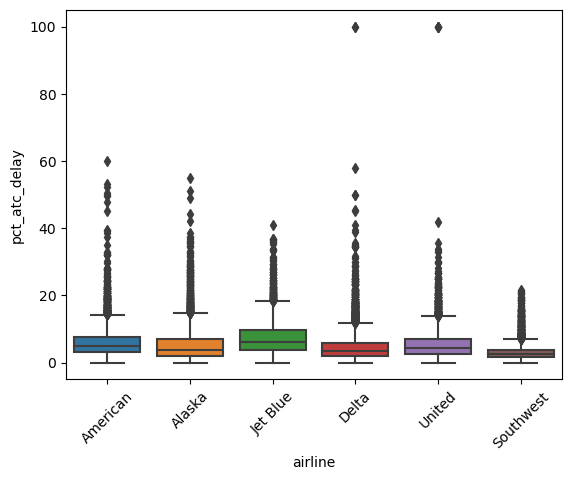

In [33]:
# Plot categorico con asse x leggibile
ax=sns.boxplot(data=airlines, x="airline", y="pct_atc_delay" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'American'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Jet Blue'),
 Text(3, 0, 'Delta'),
 Text(4, 0, 'United'),
 Text(5, 0, 'Southwest')]

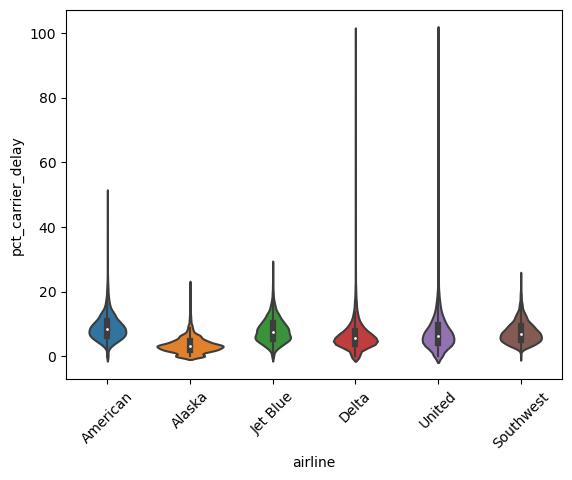

In [34]:
# Violinplot
ax=sns.violinplot(data=airlines, x="airline", y="pct_carrier_delay" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Se vogliam confrontare sullo stesso grafico tutti i ritardi per tutte le compagnie, possiamo riarrangiare il nostro dataframe con pd.melt
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

In [35]:
airlines_melt=pd.melt(airlines,id_vars=["airline"],value_vars=["pct_carrier_delay","pct_atc_delay","pct_weather_delay"])

In [36]:
airlines_melt

,airline,variable,value
0,American,pct_carrier_delay,8.153226
1,American,pct_carrier_delay,5.959924
2,American,pct_carrier_delay,7.157270
3,American,pct_carrier_delay,12.100000
4,American,pct_carrier_delay,7.333333
...,...,...,...
100399,Southwest,pct_weather_delay,1.651940
100400,Southwest,pct_weather_delay,0.261084
100401,Southwest,pct_weather_delay,0.343284
100402,Southwest,pct_weather_delay,0.122817


[Text(0, 0, 'American'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Jet Blue'),
 Text(3, 0, 'Delta'),
 Text(4, 0, 'United'),
 Text(5, 0, 'Southwest')]

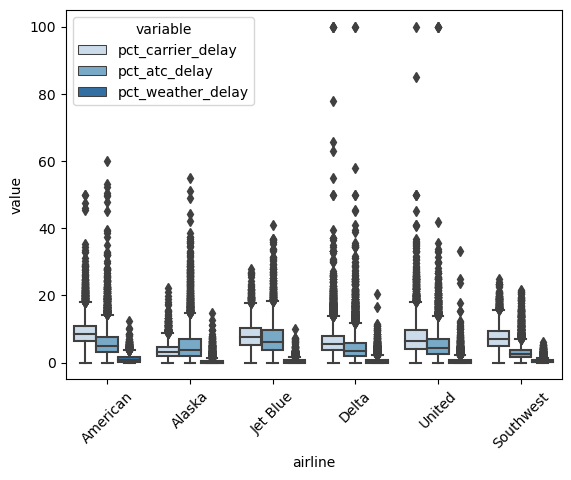

In [37]:
# Plot categorico: boxplot
ax=sns.boxplot(data=airlines_melt, x="airline", y="value", hue="variable", palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'American'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Jet Blue'),
 Text(3, 0, 'Delta'),
 Text(4, 0, 'United'),
 Text(5, 0, 'Southwest')]

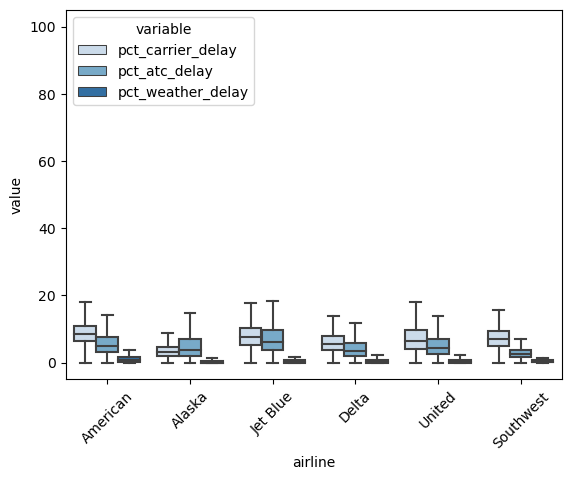

In [38]:
# Plot categorico: barplot (senza autliers)
ax=sns.boxplot(data=airlines_melt, 
               x="airline", y="value", 
               hue="variable", palette="Blues",
              fliersize=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'American'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Jet Blue'),
 Text(3, 0, 'Delta'),
 Text(4, 0, 'United'),
 Text(5, 0, 'Southwest')]

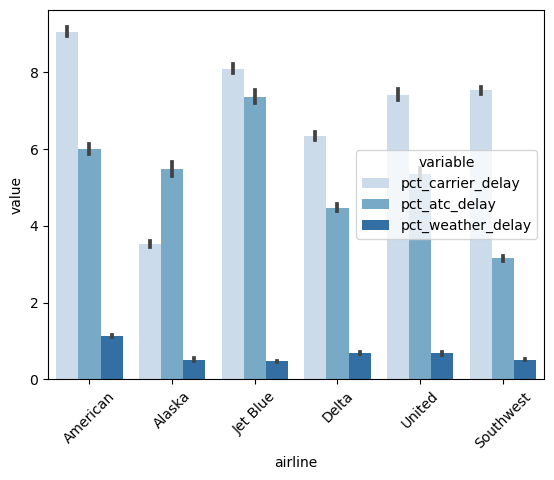

In [39]:
# Plot categorico: barplot
ax=sns.barplot(data=airlines_melt, x="airline", y="value", hue="variable", palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Esercizio

**Introduzione**
In questo esercizio utilizzeremo un nuovo file di dati per mettere in pratica quanto discusso negli esempi. Per prima cosa carichiamo 
il file ../data/kc_tax.csv.gz

In [4]:
kc_tax = pd.read_csv("../data/kc_tax.csv.gz")

In [5]:
# apriamo il file
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [6]:
#eliminiamo i NaN
kc_tax=kc_tax.dropna()

In [7]:
#cambiamo il nome delle colonne
kc_tax.columns=["Valore catastale","Metri quadrati","CAP"]
# prendiamo un sottoinsieme del database
kc_tax0 = kc_tax.loc[(kc_tax.CAP < 98020)]

In [8]:
print(kc_tax0)

        Valore catastale  Metri quadrati      CAP
1               206000.0            1870  98002.0
21              475000.0            1530  98007.0
22              517000.0            1910  98007.0
42              445000.0            1150  98008.0
43              445000.0            1460  98007.0
...                  ...             ...      ...
498198          201000.0            1390  98002.0
498199          185000.0            1110  98002.0
498235          613000.0            3050  98006.0
498236          849000.0             730  98006.0
498237         1755000.0            2520  98006.0

[63775 rows x 3 columns]


In [61]:
kc_tax1 = kc_tax0.loc[(kc_tax0.CAP > 10000)]
print(kc_tax1)

        Valore catastale  Metri quadrati      CAP
1               206000.0            1870  98002.0
21              475000.0            1530  98007.0
22              517000.0            1910  98007.0
42              445000.0            1150  98008.0
43              445000.0            1460  98007.0
...                  ...             ...      ...
498198          201000.0            1390  98002.0
498199          185000.0            1110  98002.0
498235          613000.0            3050  98006.0
498236          849000.0             730  98006.0
498237         1755000.0            2520  98006.0

[63772 rows x 3 columns]


**Svolgimento:** 
A questo punto possiamo esplorare alcune proprietà di questo database, ad esempio:

- Studiare quale sia la correlazione tra valore catastale e metri quadrati

- Studiare come varia il valore catastale a seconda del CAP

- Studiare come varia la metratura media a seconda del CAP

## Correlazione tra metri quadri e valore catastale

**Scatterplot con matplotlib**

In [9]:
CAPs = kc_tax0.groupby("CAP")

[]

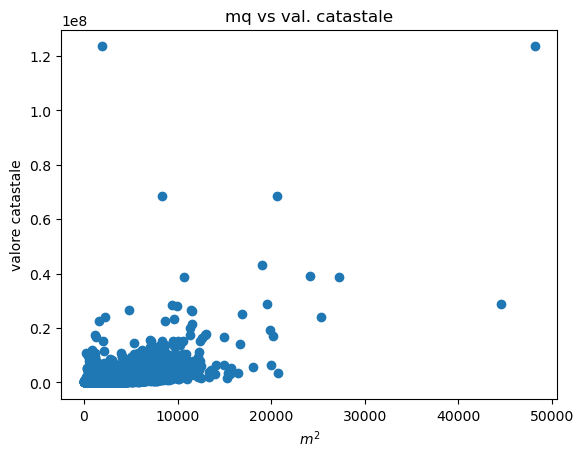

In [10]:
x=kc_tax["Metri quadrati"]
y=kc_tax["Valore catastale"]
plt.scatter(x,y)
plt.xlabel(r'$m^2$')
plt.ylabel('valore catastale')
plt.title("mq vs val. catastale")
plt.plot()

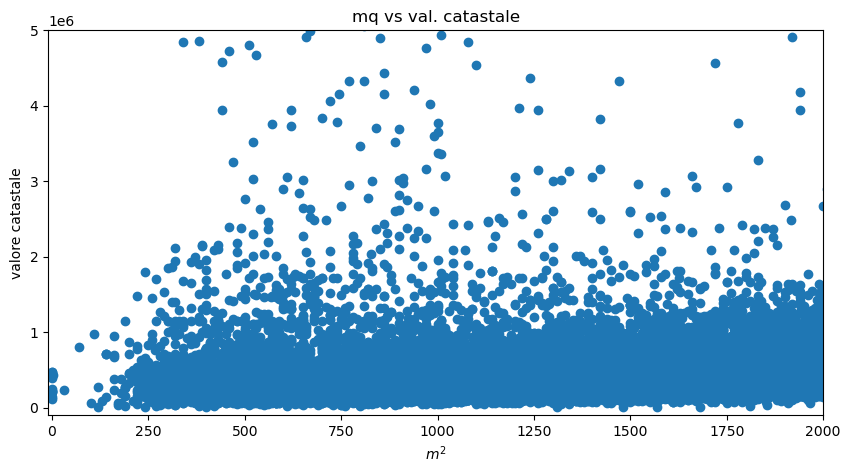

In [31]:
fig = plt.figure()
ax = plt.gca()

x=kc_tax["Metri quadrati"]
y=kc_tax["Valore catastale"]
ax.scatter(x,y)
ax.set_xlabel(r'$m^2$')
ax.set_ylabel('valore catastale')
ax.set_xlim([-10,2000])
ax.set_ylim([-0.01e7, 0.05e8])
ax.set_title("mq vs val. catastale")
ax.plot()

fig.set_figwidth(10)
fig.set_figheight(5)

In [40]:
import math
import numpy as np

**Scatterplot con seaborn**

<AxesSubplot:xlabel='Metri quadrati', ylabel='Valore catastale'>

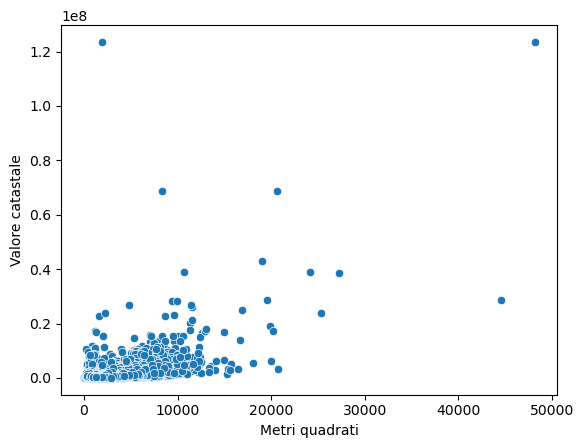

In [10]:
sns.scatterplot(data=kc_tax, x="Metri quadrati", y="Valore catastale")

## Correlazione tra CAP  e valore catastale

**Esempio**

Creo un oggetto in pandas e provo a maneggiarlo, in particolare costruisco una lista di oggetti e la trasformo in un oggetto di pandas, in questo modo ho tutte le categorie.

In [20]:
fruit_list = [('Orange', 34, 'Yes'), 
              ('Mango', 24, 'No'), 
              ('Banana', 14, 'Yes'), 
              ('Apple', 44, 'Yes'), 
              ('Pineapple', 64, 'No'), 
              ('Kiwi', 84, 'Yes')]

In [21]:
#create a DataFrame object
df = pd.DataFrame(fruit_list, columns = ['Name', 'Price', 'Stock'])
#il nome df sta per DataFrame e mi serve per ricordarmi che tipo di oggetto sto maneggiando
#L'argomento è il nome dell'oggetto, dopo di che definisco quali sono le colonne e quali nomi gli do

In [22]:
print(df)
df

        Name  Price Stock
0     Orange     34   Yes
1      Mango     24    No
2     Banana     14   Yes
3      Apple     44   Yes
4  Pineapple     64    No
5       Kiwi     84   Yes


,Name,Price,Stock
0,Orange,34,Yes
1,Mango,24,No
2,Banana,14,Yes
3,Apple,44,Yes
4,Pineapple,64,No
5,Kiwi,84,Yes


Prendo i nomi degli indici a cui corrisponde un valore della proprietà di 'Stock' pari a No

In [14]:
indexNames = df[ df['Stock'] == 'No' ].index

In [15]:
print(indexNames)

Int64Index([1, 4], dtype='int64')


In [16]:
df.drop(indexNames, inplace=True)

In [17]:
print(df)

     Name  Price Stock
0  Orange     34   Yes
2  Banana     14   Yes
3   Apple     44   Yes
5    Kiwi     84   Yes


**Inizio studio vero e proprio**

In [62]:
means = kc_tax1.groupby("CAP").mean()
print(means)

         Valore catastale  Metri quadrati
CAP                                      
89118.0      2.520000e+05     2260.000000
90055.0      6.008000e+05     3620.000000
90108.0      3.210000e+05     1520.000000
90855.0      2.720000e+05     1714.000000
95055.0      2.720000e+05     1714.000000
95059.0      1.600000e+05     2970.000000
95125.0      7.220000e+05     3270.000000
98000.0      7.079810e+05     3104.285714
98001.0      2.492691e+05     1861.693241
98002.0      2.060532e+05     1520.950955
98003.0      2.512817e+05     1872.030847
98004.0      1.409635e+06     2918.819160
98005.0      7.755859e+05     2709.520183
98006.0      6.955757e+05     2683.714771
98007.0      5.434006e+05     2113.937481
98008.0      5.778729e+05     2151.965856
98010.0      3.498731e+05     1897.948440
98011.0      3.968127e+05     2159.764356
98013.0      3.360000e+05     1390.000000
98014.0      4.361352e+05     2050.812093
98017.0      4.520000e+05     1550.000000
98019.0      4.067068e+05     2107

[]

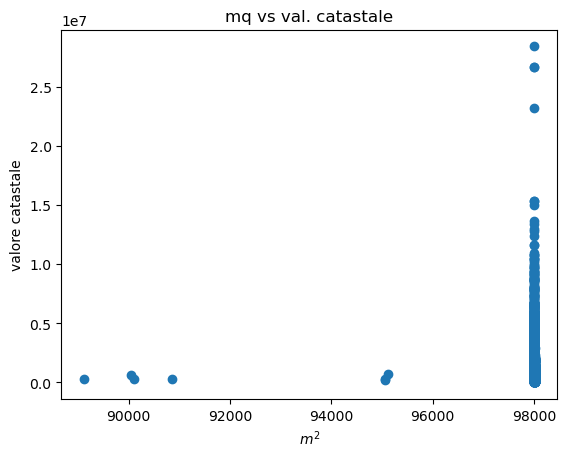

In [63]:
x=kc_tax1["CAP"]
y=kc_tax1["Valore catastale"]
plt.scatter(x,y)
plt.xlabel(r'$m^2$')
plt.ylabel('valore catastale')
plt.title("mq vs val. catastale")
plt.plot()

Questo tipo di plot che in teoria dovrebbe consentirmi di visualizzare eventuali correlazioni come in uno swarm plot in realtà non funziona perchè dato che sull'asse delle x i CAP sono distribuiti in maniera uniforme nn si riescono a distinguere le case collocate in zone con CAP diversi ma che differiscono l'uno dall'altro per poche (o poche decine) di unità.
Per questo motivo provo a fare uno swarm plot

[]

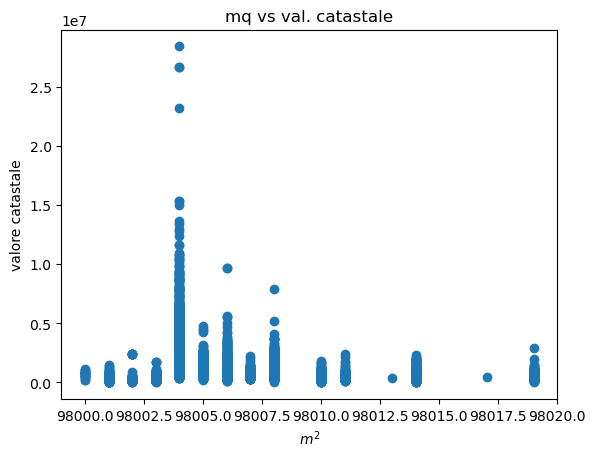

In [72]:
x=kc_tax1["CAP"]
y=kc_tax1["Valore catastale"]
plt.scatter(x,y)
plt.xlabel(r'$m^2$')
plt.ylabel('valore catastale')
plt.title("mq vs val. catastale")
plt.xlim([97999, 98020])
plt.plot()

Dato che non riesco a fare uno swarmplot perchè impiega troppo tempo a girare, quello che posso fare è provare a capire quanto tempo impiego a fare uno swarm plot di una quantità molto più ridotta di dati.

In [78]:
print(kc_tax1.index)

Int64Index([     1,     21,     22,     42,     43,     44,     45,     46,
                55,     95,
            ...
            498130, 498194, 498195, 498196, 498197, 498198, 498199, 498235,
            498236, 498237],
           dtype='int64', length=63772)


In [86]:
kc_tax.drop(kc_tax.index[10000:498248], inplace=True)

<ipython-input-86-ecfd4831be13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_tax.drop(kc_tax.index[10000:498248], inplace=True)


In [87]:
print(kc_tax)

       Valore catastale  Metri quadrati      CAP
1              206000.0            1870  98002.0
2              303000.0            1530  98166.0
3              361000.0            2000  98108.0
4              459000.0            3150  98108.0
5              223000.0            1570  98032.0
...                 ...             ...      ...
10703          257000.0            2020  98118.0
10704          362000.0             980  98122.0
10705          414000.0            3045  98122.0
10706          488000.0            7750  98122.0
10707          498000.0            1930  98115.0

[10000 rows x 3 columns]


<ipython-input-93-9940c7d2a075>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


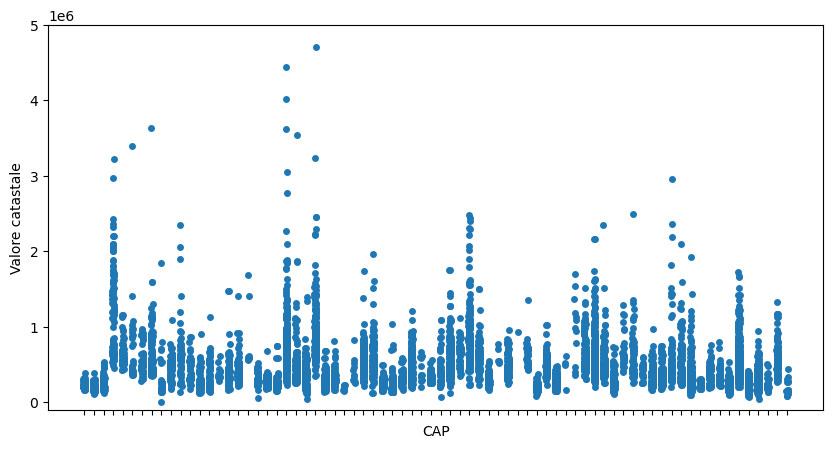

In [93]:
fig = plt.figure()

ax = sns.stripplot(data=kc_tax, x="CAP", y='Valore catastale')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.plot()
ax.set_ylim([-0.1e6, 5e6])

fig.set_figwidth(10)
fig.set_figheight(5)

A questo punto in realtà quello che può essere interessante è fare un plot di questo tipo distinguendo sulla base della metratura della casa in maniera tale da poter osservare per ciascun CAP la variazione del valore catastale delle abitazioni in funzione anche della loro metratura.

<ipython-input-95-8f38dc6c3acc>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


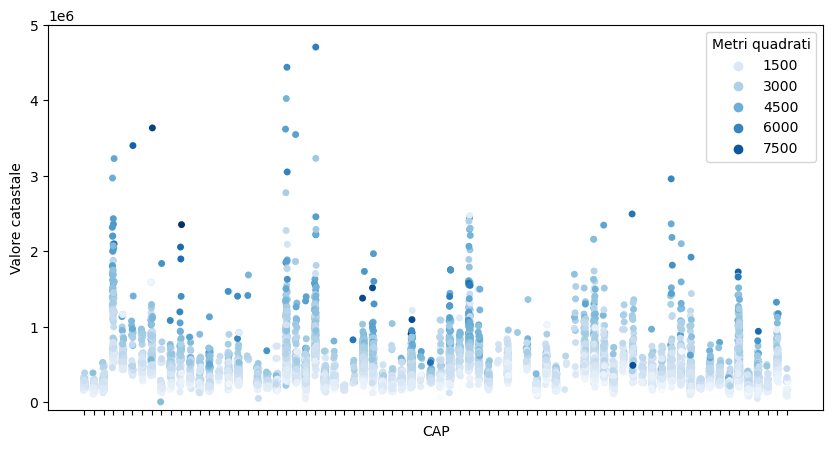

In [95]:
fig = plt.figure()

ax = sns.stripplot(data=kc_tax, x="CAP", y='Valore catastale', hue='Metri quadrati', palette='Blues', legend='auto')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.plot()
ax.set_ylim([-0.1e6, 5e6])

fig.set_figwidth(10)
fig.set_figheight(5)

Provo per curiosità a fare uno swarmplot anche se mi aspetto che risulti meno leggibile di uno stripplot

/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 97.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 97.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 93.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.p

/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 98.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 95.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 98.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.p

/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 95.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/elisa/miniconda3/lib/python3.9/site-packages/seaborn/categorical.p

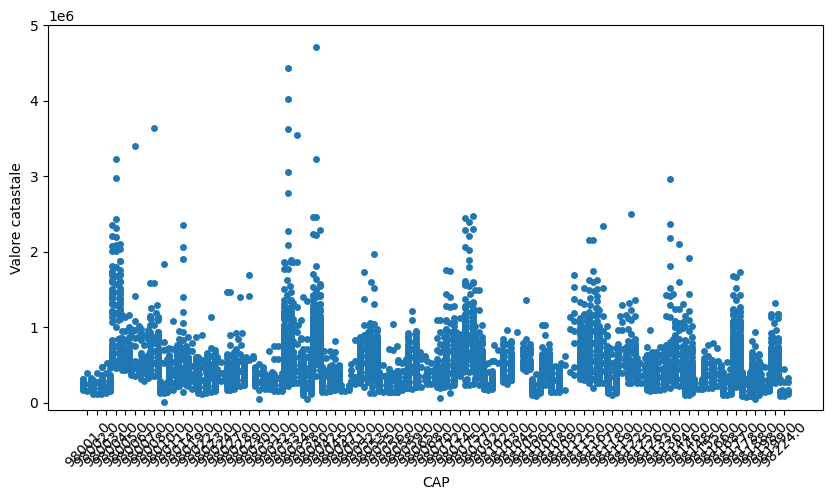

In [94]:
fig = plt.figure()

ax = sns.swarmplot(data=kc_tax, x="CAP", y='Valore catastale')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.plot()
ax.set_ylim([-0.1e6, 5e6])

fig.set_figwidth(10)
fig.set_figheight(5)

In [98]:
kc_tax2 = kc_tax.loc[(kc_tax.CAP < 98020)]

Dato che l'analisi mediante swarmplot risulta complicata per via del gran numero di dati da rappresentare, quello che posso fare è utilizzare un boxplot che per lo meno mi da delle informazioni sui quantili principali.

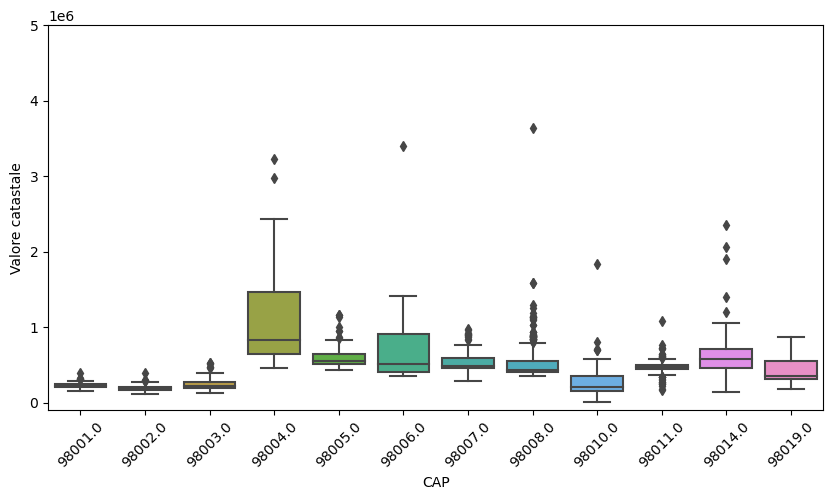

In [100]:
fig = plt.figure()

ax = sns.boxplot(data=kc_tax2, x="CAP", y='Valore catastale')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.plot()
ax.set_ylim([-0.1e6, 5e6])

fig.set_figwidth(10)
fig.set_figheight(5)

Potrei fare questa stessa analisi per tutti gli altri CAP.

Naturalmente quello che potrebbe essere utile avere sarebbe la suddivisione in città grandi o città piccole sulla base del CAP o avere in generale i dati disaggregati sulla base di altre informazioni oltre al CAP, nel senso che dal CAP potrei ottenere molte più informazioni in linea di principio.

## Correlazione tra CAP e metratura

In realtà per questa analisi, dato che più o meno ho già intuito come funziona utilizzo solo i plot migliori della sezione precedente.

<ipython-input-106-5147c57941b2>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


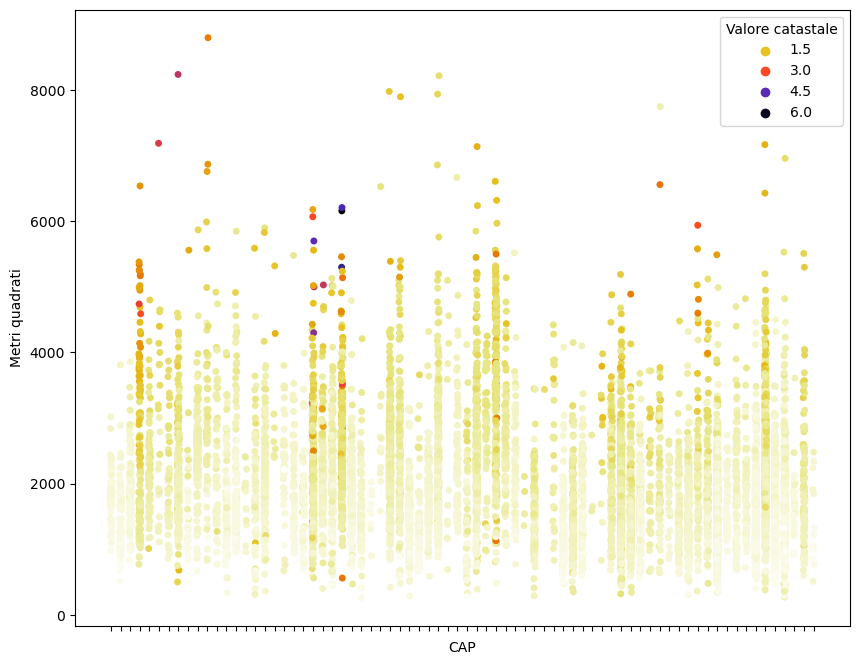

In [106]:
fig = plt.figure()

ax = sns.stripplot(data=kc_tax, x="CAP", y='Metri quadrati', hue='Valore catastale', palette='CMRmap_r', legend='auto')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.plot()
#ax.set_ylim([-0.1e6, 5e6])

fig.set_figwidth(10)
fig.set_figheight(8)

In questo caso potrebbe essere interessante fare anche uno scatterplot

[]

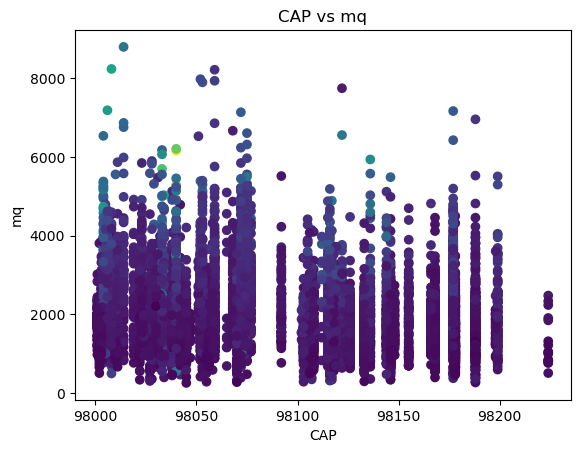

In [112]:
x=kc_tax["CAP"]
y=kc_tax["Metri quadrati"]
c=kc_tax["Valore catastale"]
plt.scatter(x,y, c=c, cmap='viridis')
plt.xlabel('CAP')
plt.ylabel('mq')
plt.title("CAP vs mq")
plt.plot()

### La matrice di covarianza

In questo esempio costruiamo la matrice di covarianza a partire da un set di dati finanziari (il prezzo delle azioni SP500).

In [3]:
# importiamo i dati
sp500_sym = pd.read_csv("../data/sp500_sectors.csv") # simboli
sp500_px = pd.read_csv("../data/sp500_data.csv.gz", index_col=0) # dati di borsa

In [4]:
sp500_sym

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


Quindi questo dataset di pandas ha per ogni azione (riga) informazioni sul settore, l'etichetta che viene utilizzata per il settore, il sottosettore e il simbolo che viene utilizzato per rappresentare il settore.
In questo caso, questo dataset serve per potermi orientare e poter più facilmente maneggiare il secondo dataset, cioè quello che non ho ancora stampato.

In [5]:
sp500_px

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,0.039997,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,0.000000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,-0.040001,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,0.020001,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


Questo secondo file contiene il valore di tutte le azioni che sono riportate nella tabella precedente (infatti prima avevo 517 righe $\rightarrow$ 517 simboli e ora ho 517 colonne). 
Per ogni titolo è riportato il valore (immagino medio della giornata) per una serie di giorni dal '93 al '15

Ora quello che faccio è creare un nuovo datasete pandas contenente solo i titoli del settore delle telecomunicazioni. In pratica genero una sorta di *copia selettiva* dei miei dati, per cui genero un nuovo oggetto all'interno del quale copio solo alcune delle informazioni contenute nel dataset precedente.

In [6]:
# Table 1-7
# Consideriamo il settore telecomunicazioni
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecomSymbols

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

Qui per ora ho fatto il procedimento solo con i simboli, ho creato un vettore di simboli (con i rispettivi indici anche ovviamente).
Ora creo davvero un sotto-dataset, a partire dal dataset principale, selezionando solo i dati che soddisfano certe condizioni, innanzitutto chiedo che le informazioni sul prezzo siano da una certa data in avanti, dopo di che chiedo che il loro simbolo sia uno di quelli contenuti nel vettore che ho creato prima.

In [7]:
# Filtriamo i dati considerando il periodo 07/2012-06/2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


**Nota:** da qui in avanti sto considerando un altro settore, ho smesso di considerare il settore delle telecomunicazioni, ora lavoro con il settore dei titoli di mercato.

In sostanza ora rifaccio il procedimento che ho fatto prima solo che per i titoli del settore finanziario

In [9]:
# Focalizziamoci su di un sottoinsieme dei dati 
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

In [13]:
sp500_sym[sp500_sym['sector'] == 'etf']
#sp500_sym[sp500_sym['sector'] == 'etf']['symbol']

,sector,sector_label,sub_sector,symbol
315,etf,EFTs,industrials,XLI
316,etf,EFTs,broad,QQQ
317,etf,EFTs,broad,SPY
318,etf,EFTs,broad,DIA
319,etf,EFTs,broad,GLD
320,etf,EFTs,broad,VXX
321,etf,EFTs,broad,USO
322,etf,EFTs,broad,IWM
323,etf,EFTs,energy,XLE
324,etf,EFTs,consumer_discretionary,XLY


In [10]:
etfs

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.400000,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.520000,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.560000,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.800000,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.480000,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,-0.379997,-0.669998,-1.270004,-1.398679,0.010002,0.279999,-0.069999,-0.497896,-0.750000,-0.200005,-0.309997,-0.059997,-0.229999,0.189994,-0.279999,-0.220002,-0.330002
2015-06-26,-0.040001,-0.700004,-0.389999,-0.079926,0.360001,-0.020001,0.189999,-0.587512,0.259995,-0.010002,0.340000,-0.290001,-0.280002,-0.220001,0.029998,-0.030001,-0.330002
2015-06-29,-0.590000,-1.320000,-2.580002,-1.918189,0.260002,1.829999,-0.080000,-2.280327,-0.500000,-1.089996,-0.160000,-0.769996,-0.700001,-1.180000,-0.500000,-0.330000,-0.450000
2015-06-30,-0.480000,-0.419998,-1.369996,-1.168887,0.130005,0.889999,0.139999,-0.338568,-0.169998,-0.430001,-0.310001,-0.270001,0.259999,-0.510002,-0.580002,-0.150002,-0.269996


Per visualizzare la correlazione quello che faccio è semplicemente calcolare con pandas la matrice di correlazione per i dati che ho preso in considerazione e dopo di che farne il plot.

In [16]:
# calcoliamo la matrice di covarianza
etfs.corr()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.000000,0.785865,0.888865,0.869680,0.056554,-0.468196,0.236881,0.782380,0.650054,0.798080,0.380809,0.784144,0.374000,0.663022,0.600424,0.787340,0.777773
QQQ,0.785865,1.000000,0.908995,0.834440,0.043553,-0.470555,0.199492,0.810158,0.560044,0.839701,0.346667,0.713463,0.421790,0.775392,0.614806,0.752771,0.945126
SPY,0.888865,0.908995,1.000000,0.953726,0.078722,-0.547074,0.272069,0.833937,0.713300,0.887028,0.481928,0.826053,0.406181,0.811269,0.744466,0.883616,0.886588
DIA,0.869680,0.834440,0.953726,1.000000,0.051523,-0.511327,0.256793,0.758012,0.658311,0.847043,0.463364,0.787415,0.383928,0.771044,0.753725,0.860556,0.842757
GLD,0.056554,0.043553,0.078722,0.051523,1.000000,-0.107488,0.216563,0.070110,0.188625,0.017467,0.121611,0.184366,-0.042233,-0.010200,0.033047,0.043039,0.053022
VXX,-0.468196,-0.470555,-0.547074,-0.511327,-0.107488,1.000000,-0.195397,-0.448942,-0.448474,-0.474756,-0.260395,-0.470890,-0.205661,-0.380925,-0.416913,-0.514365,-0.477258
USO,0.236881,0.199492,0.272069,0.256793,0.216563,-0.195397,1.000000,0.249799,0.525943,0.183275,0.113182,0.324166,0.078796,0.119500,0.116857,0.221760,0.225962
IWM,0.782380,0.810158,0.833937,0.758012,0.070110,-0.448942,0.249799,1.000000,0.586991,0.779750,0.325003,0.701533,0.387274,0.664288,0.537065,0.756282,0.760438
XLE,0.650054,0.560044,0.713300,0.658311,0.188625,-0.448474,0.525943,0.586991,1.000000,0.578956,0.337942,0.689778,0.260463,0.454457,0.413486,0.599129,0.559324
XLY,0.798080,0.839701,0.887028,0.847043,0.017467,-0.474756,0.183275,0.779750,0.578956,1.000000,0.366827,0.721232,0.370299,0.702860,0.663055,0.782053,0.772189


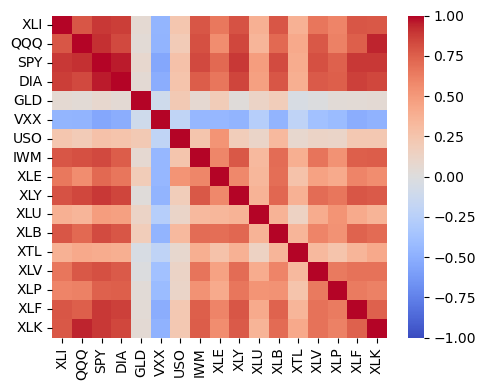

In [15]:
# Mostriamo la matrice di covarianza come heatmap
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap="coolwarm", #colormap divergente
                 ax=ax)

plt.tight_layout()
plt.show()